In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy.signal
%config InlineBackend.figure_format='retina'

import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt

In [2]:
DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/DT5550W/"

In [9]:
chs=["0"]
ftime_min=ftime_max=None

data  = hpt.load_finetime(f"{DATA_DIR}/102.data", chs =chs, ftime_min=ftime_min, ftime_max=ftime_max, finetime_roll=0)
data_baseline  = hpt.load_finetime(f"{DATA_DIR}/117.data", chs =chs, ftime_min=ftime_min, ftime_max=ftime_max, finetime_roll=0)

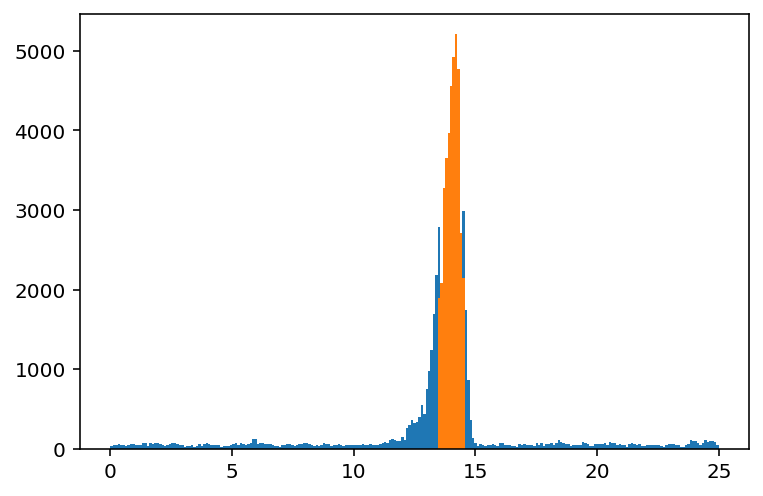

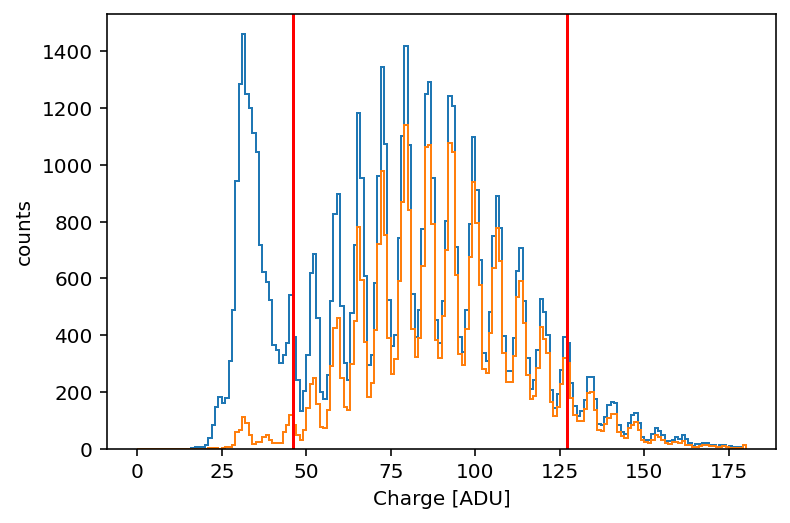

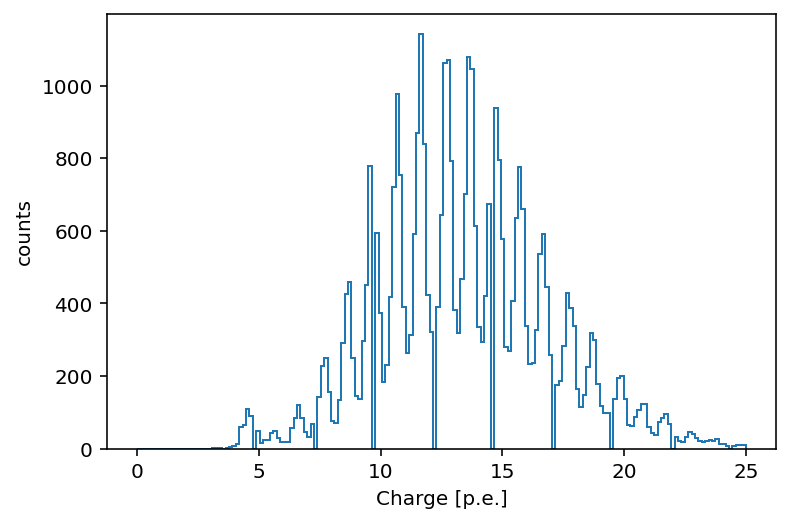

Average charge 13.461379820079353 [p.e.]; std= 3.556794251987588 [p.e.]


In [12]:
# use time cut to select laser events
mask_ft = (data[f"FINE_calib_{ch}"]>13.5)&(data[f"FINE_calib_{ch}"]<14.5)
hist(data[f"FINE_calib_{ch}"], bins=np.linspace(0,25,250));
hist(data[f"FINE_calib_{ch}"][mask_ft], bins=np.linspace(0,25,250));
show()


baseline = np.median(data_baseline[f"CHARGE_{ch}"][~np.isnan(data_baseline[f"CHARGE_{ch}"])])
n,ibins,_ = hist(data[f"CHARGE_{ch}"]-baseline, bins=np.linspace(0,180,181),histtype="step");
n,ibins,_ = hist(data[f"CHARGE_{ch}"][mask_ft]-baseline, bins=np.linspace(0,180,181),histtype="step");
# hist(data_baseline[f"CHARGE_{ch}"]-baseline, bins=np.linspace(0,180,181),histtype="step");
xlabel("Charge [ADU]")
ylabel("counts")
axvline(46,color="r")
axvline(127,color="r")
show()


# peak_locs,peak_info = scipy.signal.find_peaks(n, threshold=20,prominence=20)
# print(np.diff(peak_locs))
# peak_gap = np.median(np.diff(peak_locs)) * (ibins[1]-ibins[0])
peak_gap = (127-46)/12
data[f"CHARGE_calib_{ch}"] = (data[f"CHARGE_{ch}"]-baseline)/peak_gap
mask_nan = ~np.isnan(data[f"CHARGE_calib_{ch}"])
hist(data[f"CHARGE_calib_{ch}"][mask_ft&mask_nan], bins=np.linspace(0,25,180),histtype="step");
xlabel("Charge [p.e.]")
ylabel("counts")
show()

print("Average charge",np.mean(data[f"CHARGE_calib_{ch}"][mask_ft&mask_nan]), "[p.e.]; std=",np.std(data[f"CHARGE_calib_{ch}"][mask_ft&mask_nan]), "[p.e.]")

In [10]:
sqrt(np.mean(data[f"CHARGE_calib_{ch}"][mask_ft&mask_nan]))

3.6689753092763318

In [11]:
print(baseline, peak_gap)

24.0 6.75


# Scintillator bar

In [4]:
chs=["16"]
ch=chs[0]
ftime_min=ftime_max=None

data  = hpt.load_finetime(f"{DATA_DIR}/165.data", chs =chs, ftime_min=ftime_min, ftime_max=ftime_max, finetime_roll=0)
# data_baseline  = hpt.load_finetime(f"{DATA_DIR}/117.data", chs =chs, ftime_min=ftime_min, ftime_max=ftime_max, finetime_roll=0)

31.0


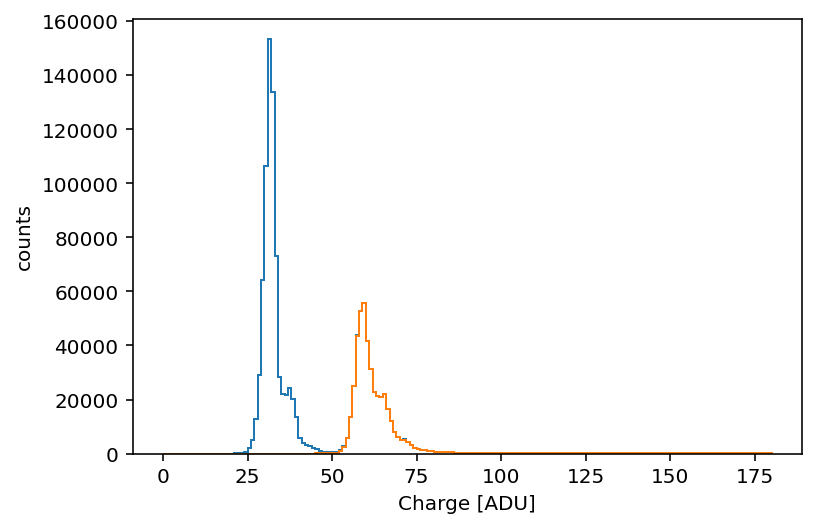

In [18]:
mask_hit = data[f"HIT_{ch}"]==1
sum(mask_hit)/len(mask_hit)

n,ibins,_ = hist(data[f"CHARGE_{ch}"], bins=np.linspace(0,180,181),histtype="step");
n,ibins,_ = hist(data[f"CHARGE_{ch}"][mask_hit], bins=np.linspace(0,180,181),histtype="step");
xlabel("Charge [ADU]")
ylabel("counts")

baseline = np.median(data[f"CHARGE_{ch}"][~mask_hit])
print(baseline)
show()

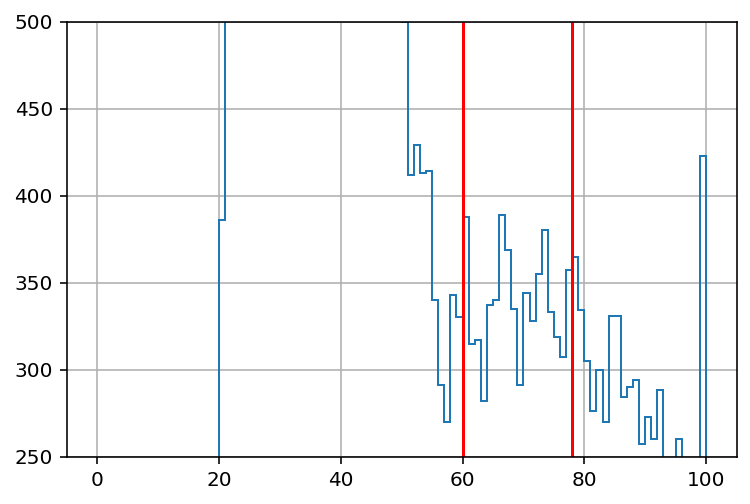

In [16]:
n,ibins,_ = hist(data[f"CHARGE_{ch}"][mask_hit]-baseline, bins=np.linspace(0,100,101),histtype="step");
# yscale("log")
ylim(250,500)
grid()

x1=60
x2=78

axvline(x1,color="r")
axvline(x2,color="r")
show()